In [227]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

In [195]:
df = pd.read_csv('../data/measurements.csv')

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [197]:
df.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [198]:
unique_distance = df["distance"].unique()
unique_distance

array(['28', '12', '11,2', '12,9', '18,5', '8,3', '7,8', '12,3', '4,9',
       '11,9', '12,4', '11,8', '24,7', '17,3', '33,4', '25,9', '25,3',
       '14,2', '17,9', '18,4', '18,3', '32,6', '19', '12,1', '20', '4,5',
       '11,7', '10,2', '5,4', '2', '16', '27,3', '10,6', '11,6', '13,1',
       '6,1', '153,5', '2,9', '2,1', '9,8', '6,8', '14', '13,9', '9,7',
       '24,8', '34,8', '5,2', '10,5', '13,2', '13', '12,2', '12,5',
       '15,7', '6,4', '5,3', '26,2', '18,8', '22,9', '162,7', '16,6',
       '15,9', '5,1', '22,4', '31,1', '16,1', '4,2', '17,4', '23,5', '7',
       '20,1', '20,8', '1,7', '35,9', '36,9', '16,8', '9,9', '36,6',
       '44,9', '21,6', '39,4', '26,6', '53,2', '18,9', '43,5', '16,4',
       '21,1', '22,7', '44,4', '35,8', '40,6', '14,1', '58,7', '16,2',
       '31,8', '51,6', '38,6', '81,2', '130,3', '67,2', '43,7', '56,1',
       '39', '38,5', '28,2', '19,6', '22,2', '13,6', '12,6', '8,7', '7,9',
       '2,4', '18,1', '1,3', '13,4', '12,8', '29', '31,4', '27,1', '

In [199]:
unique_consume = df["consume"].unique()
unique_consume

array(['5', '4,2', '5,5', '3,9', '4,5', '6,4', '4,4', '5,3', '5,6', '4,6',
       '5,9', '5,1', '4,7', '4,9', '5,7', '4,1', '5,8', '4,8', '4,3',
       '5,2', '7,4', '6,5', '4', '3,3', '9,9', '6,1', '6,2', '7,9',
       '12,2', '5,4', '3,6', '6,9', '8,7', '6,3', '6', '10,8', '8,1',
       '7,1', '3,8', '9', '3,7', '11,5', '6,6'], dtype=object)

In [200]:
unique_gas_types = df["gas_type"].unique()
unique_gas_types

array(['E10', 'SP98'], dtype=object)

In [201]:
unique_speed = df["speed"].unique()
unique_speed

array([26, 30, 38, 36, 46, 50, 43, 40, 42, 59, 58, 24, 32, 39, 37, 62, 57,
       21, 28, 29, 35, 51, 23, 55, 44, 25, 63, 61, 82, 52, 18, 41, 20, 56,
       45, 22, 60, 33, 34, 71, 75, 66, 27, 49, 14, 80, 53, 47, 73, 69, 85,
       67, 54, 31, 48, 16, 88, 65, 90, 87], dtype=int64)

In [202]:
unique_temp_inside = df["temp_inside"].unique()
unique_temp_inside

array(['21,5', '22,5', '20', nan, '21', '20,5', '23', '23,5', '25', '24',
       '22', '19', '24,5', '25,5'], dtype=object)

In [203]:
unique_AC = df["AC"].unique()
unique_AC

array([0, 1], dtype=int64)

In [204]:
unique_rain = df["rain"].unique()
unique_rain

array([0, 1], dtype=int64)

In [205]:
unique_sun = df["sun"].unique()
unique_sun

array([0, 1], dtype=int64)

In [206]:
unique_refill_liters = df["refill liters"].unique()
unique_refill_liters

array(['45', nan, '37,6', '37,7', '38', '38,3', '10', '39', '41', '37',
       '37,2'], dtype=object)

In [207]:
unique_refill_gas = df["refill gas"].unique()
unique_refill_gas

array(['E10', nan, 'SP98'], dtype=object)

In [208]:
unique_refill_gas = df["specials"].unique()
unique_refill_gas

array([nan, 'AC rain', 'AC', 'rain', 'snow', 'AC snow',
       'half rain half sun', 'sun', 'AC sun', 'sun ac', 'ac', 'AC Sun',
       'ac rain'], dtype=object)

In [209]:
"""
Our data set has the following columns:

distance: Number of kilometers done
consume: Number of liters consumed during the trip
speed: Average Speed on the trip
temp_inside: Temp inside the vehicle
temp_outside: Temp outside the vehicle
specials: We can see that this were special conditions
gas_type: Type of gas used on the vehicle
refill liters: Number of liters refilled if needed
refill gas: type of was used on the refill

---

The next Values are binari meaning they values 0 or 1 so we understand that this means that they existed or where turn on
AC:
rain:
sun:

"""

'\nOur data set has the following columns:\n\ndistance: Number of kilometers done\nconsume: Number of liters consumed during the trip\nspeed: Average Speed on the trip\ntemp_inside: Temp inside the vehicle\ntemp_outside: Temp outside the vehicle\nspecials: We can see that this were special conditions\ngas_type: Type of gas used on the vehicle\nrefill liters: Number of liters refilled if needed\nrefill gas: type of was used on the refill\n\n---\n\nThe next Values are binari meaning they values 0 or 1 so we understand that this means that they existed or where turn on\nAC:\nrain:\nsun:\n\n'

In [210]:
# Now that i have all the data analized i must see which columns must me cleaned

In [211]:
# if they didnt refill then i want 0 liters not nan
df["refill liters"].fillna(0, inplace=True)

# if we didnt refill was then we also prefer to have NO_REFILL instead of NaN
df["refill gas"].fillna("no_refill", inplace=True)

# if nothnig happen the we prefer having NOTHing
df["specials"].fillna("nothing", inplace=True)

# i porefer to have all the coplumns with underscore
df.rename(columns={"refill liters": "refill_liters"}, inplace=True)
df.rename(columns={"refill gas": "refill_gas"}, inplace=True)

# We need to change the type of this column to be able to work wwith it
df["distance"] = df["distance"].str.replace(',', '.').astype(float)
df["consume"] = df["consume"].str.replace(',', '.').astype(float)
df["refill_liters"] = df["refill_liters"].str.replace(',', '.').astype(float)

In [212]:
# now we know that the data is consistent and we dont have mix on fuels

df['different_fuel'] = ((df['gas_type'] != df['refill_gas'])& (df['refill_gas'] == 'No_refill')).astype(int)
unique_different_fuel = df["different_fuel"].unique()
unique_different_fuel

array([0])

In [213]:
# the info in temp_inside is not usefull the see consumnption, so we will drop the column, 
# also because we dont have this info for all the columns, and this case seeing that we dont have that much info is going to be better to drop this column to loose the rows
# We will also drop the column we just creted becasue is we created it to so check the data
df.drop('different_fuel', axis=1, inplace=True)
df.drop('temp_inside', axis=1, inplace=True)

# seeing that the refilled fuel is the same that we already have im going toi remove this column also
df.drop('refill_gas', axis=1, inplace=True)

df.drop('refill_liters', axis=1, inplace=True)

In [214]:
df["specials"] = df["specials"].str.lower().str.replace(" ", "_")

In [215]:
unique_refill_gas = df["specials"].unique()
unique_refill_gas

array(['nothing', 'ac_rain', 'ac', 'rain', 'snow', 'ac_snow',
       'half_rain_half_sun', 'sun', 'ac_sun', 'sun_ac'], dtype=object)

In [216]:
oneonehotencoder = OneHotEncoder()
encoded_features = oneonehotencoder.fit_transform(df[["specials"]].astype(str)).toarray()
df_encoded = pd.concat([df, pd.DataFrame(encoded_features, columns=oneonehotencoder.get_feature_names_out(["specials"]))], axis=1)

# Drop the original 'specials' column
df_encoded.drop(columns="specials", inplace=True)

In [217]:
oneonehotencoder = OneHotEncoder()
encoded_features = oneonehotencoder.fit_transform(df[["gas_type"]].astype(str)).toarray()
df_encoded = pd.concat([df_encoded, pd.DataFrame(encoded_features, columns=oneonehotencoder.get_feature_names_out(["gas_type"]))], axis=1)

# Drop the original 'specials' column
df_encoded.drop(columns="gas_type", inplace=True)

In [218]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   distance                     388 non-null    float64
 1   consume                      388 non-null    float64
 2   speed                        388 non-null    int64  
 3   temp_outside                 388 non-null    int64  
 4   AC                           388 non-null    int64  
 5   rain                         388 non-null    int64  
 6   sun                          388 non-null    int64  
 7   specials_ac                  388 non-null    float64
 8   specials_ac_rain             388 non-null    float64
 9   specials_ac_snow             388 non-null    float64
 10  specials_ac_sun              388 non-null    float64
 11  specials_half_rain_half_sun  388 non-null    float64
 12  specials_nothing             388 non-null    float64
 13  specials_rain       

In [220]:
df_encoded.columns

Index(['distance', 'consume', 'speed', 'temp_outside', 'AC', 'rain', 'sun',
       'specials_ac', 'specials_ac_rain', 'specials_ac_snow',
       'specials_ac_sun', 'specials_half_rain_half_sun', 'specials_nothing',
       'specials_rain', 'specials_snow', 'specials_sun', 'specials_sun_ac',
       'gas_type_E10', 'gas_type_SP98'],
      dtype='object')

In [222]:
scaler = StandardScaler()

df_encoded["temp_outside"] = scaler.fit_transform(df_encoded["temp_outside"].values.reshape(-1, 1))
df_encoded["speed"] = scaler.fit_transform(df_encoded["speed"].values.reshape(-1, 1))
df_encoded["distance"] = scaler.fit_transform(df_encoded["distance"].values.reshape(-1, 1))

Text(0.5, 1.0, 'Correlation Gas variables')

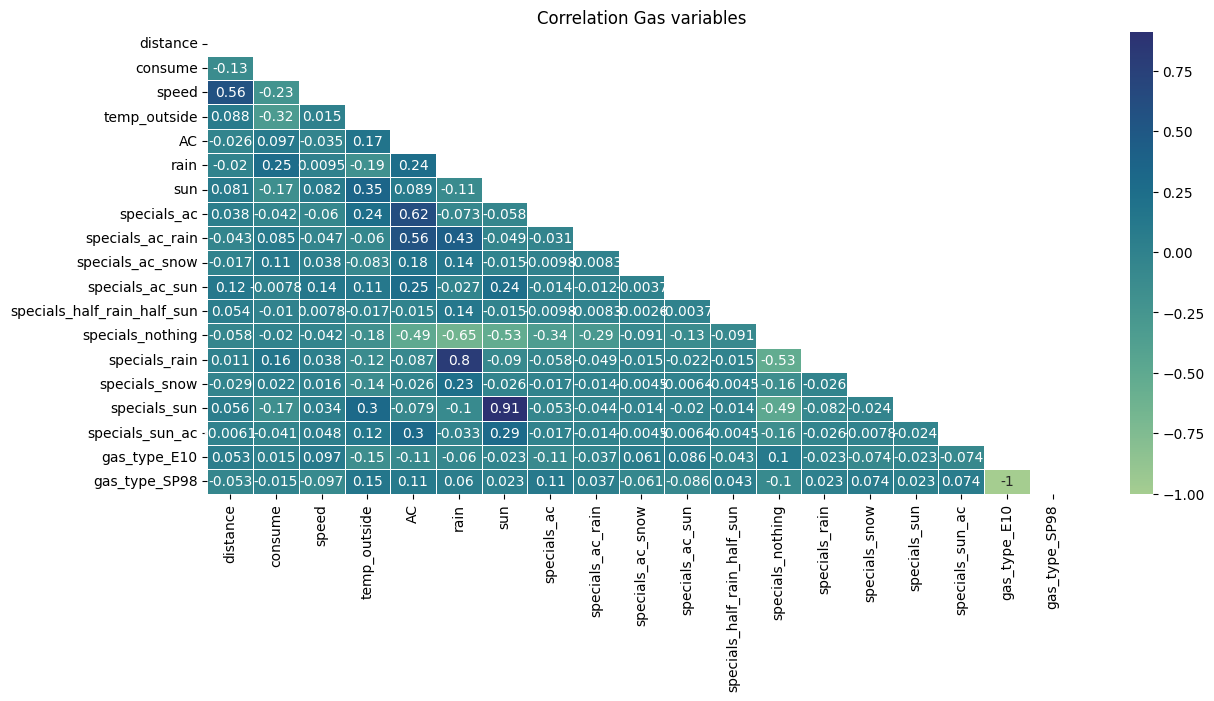

In [223]:
plt.figure(figsize=(14, 6))
mask = np.triu(np.ones_like(df_encoded.corr()), k=0)
sns.heatmap(df_encoded.corr(), annot=True, cmap='crest', linewidths=0.5, mask=mask)
plt.title("Correlation Gas variables")

In [226]:
X = df_encoded.drop(columns="consume")
y = df_encoded.consume
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)